## **HR Analytics- Job Change of Data Scientists**

**Context and Content**

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

**The dataset is imbalanced**.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

-**enrollee_id** : Unique ID for candidate

-**city**: City code

**city_ development _index** : Developement index of the city (scaled)

**gender**: Gender of candidate

**relevent_experience**: Relevant experience of candidate

**enrolled_university**: Type of University course enrolled if any

**education_level**: Education level of candidate

**major_discipline **:Education major discipline of candidate

**experience**: Candidate total experience in years

**company_size**: No of employees in current employer's company

**company_type** : Type of current employer

**lastnewjob**: Difference in years between previous job and current job

**training_hours**: training hours completed

**target**: 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

In [62]:
#Instaling imblearn module in case to need to oversample a target variable.
! pip install imbalanced-learn

In [63]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [64]:
#Reading Data
train = pd.read_csv('C:\\Users\\Asus\\Desktop\\Quitjob\\data\\train.csv',sep=',',na_values=['NaN'])
test = pd.read_csv('C:\\Users\\Asus\\Desktop\\Quitjob\\data\\test.csv',sep=',',na_values=['NaN'])

In [65]:
#Checking Train Dataframe
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


##### **1 Data Analysis and Data Augmentation**

In [66]:
#GLOBAL FUNCTIONS
#Data check
def data_check(df):
    print('dataframe shape', df.shape)
    print()
    print(df.describe)
    print()
    print('Dataframe NaN Values')
    print(df.isna().sum())
    print()
    print(df.info())


#Gender 
def gender(gender):
    if gender == 'Male':
        return 'Male'
    elif gender == 'Female':
        return 'Female'
    else:
        return 'Unspecified'


#Enrolled at University
def course(course):
    if course == 'no_enrollment':
        return 'no_enrollment'
    elif course == 'Full time course ':
        return 'FullTime'
    elif course== 'Part time course':
        return 'PartTime'
    else:
        return 'Unknow'


#Education Level
def education_level(level):
    if level == 'NaN':
        return 'Unknow'
    else:
        return level
    

#MajorDiscipline
def major_discipline(discipline):
    if discipline == 'NaN':
        return 'Unknow'
    else:
        return discipline



#Experience
def experience(exp):
    if exp == 'NaN':
        return 'Unknow'
    else:
        return exp

    
#Company Size
def company_size(size):
    if size == 'NaN':
        return 'Unknow'
    else:
        return size
    
    
#Company Type
def company_type(company_type):
    if company_type == 'NaN':
        return 'Unknow'
    else:
        return company_type


#Last Job
def last_job(last_job):
    if last_job == 'NaN':
        return 'Unknow'
    else:
        return last_job


#Discretize experience
def discrete_exp(exp):
    if exp=='<1'      :   return '<1'
    if exp=='1'       :   return '1-10' 
    if exp=='2'       :   return '1-10' 
    if exp=='3'       :   return '1-10' 
    if exp=='4'       :   return '1-10' 
    if exp=='5'       :   return '1-10'
    if exp=='6'       :   return '1-10' 
    if exp=='7'       :   return '1-10' 
    if exp=='8'       :   return '1-10'  
    if exp=='9'       :   return '1-10'  
    if exp=='10'      :   return '1-10'  
    if exp=='11'      :   return '11-20'
    if exp=='12'      :   return '11-20'
    if exp=='13'      :   return '11-20' 
    if exp=='14'      :   return '11-20' 
    if exp=='15'      :   return '11-20' 
    if exp=='16'      :   return '11-20'
    if exp=='17'      :   return '11-20'
    if exp=='18'      :   return '11-20'
    if exp=='19'      :   return '11-20' 
    if exp=='20'      :   return '11-20' 
    if exp=='>20'     :   return '>20'
    else              :   return 'Unknow'
    
    
#Job Quitting 
def job_quit(scientist):
    if scientist == 1.0:
        return 'Job Change'
    else:
        return 'Not Changing'

#### **1.1 Data Wrangling**

In [67]:
# Apply the fillna method to incluce NaN string
train = train.fillna('NaN')

#Applying Functions to delete NaN values
train['gender'] = train['gender'].apply(gender)

train['enrolled_university'] = train['enrolled_university'].apply(course)

train['education_level'] = train['education_level'].apply(education_level)

train['major_discipline'] = train['major_discipline'].apply(major_discipline)

train['experience'] = train['experience'].apply(experience)

train['company_size'] = train['company_size'].apply(company_size)

train['company_type'] = train['company_type'].apply(company_type)

train['last_new_job'] = train['last_new_job'].apply(last_job)

train['experience_summary'] = train['experience'].apply(discrete_exp)

In [68]:
#Dropping enrolle_id and City code
train = train.drop(columns=['enrollee_id','city'])

#### **1.2 Data Visualization and Insights from Data**

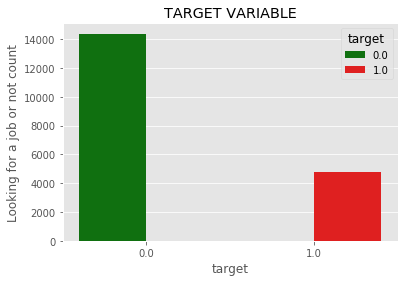

In [69]:
#Target Variable
color = ['green','red']
sns.countplot(data=train, x='target',hue='target',palette=color)
plt.title('TARGET VARIABLE')
plt.ylabel('Looking for a job or not count')
plt.show()

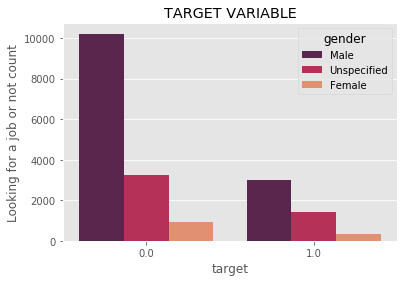

In [70]:
#Target Variable
sns.countplot(data=train, x='target',hue='gender',palette='rocket')
plt.title('TARGET VARIABLE')
plt.ylabel('Looking for a job or not count')
plt.show()

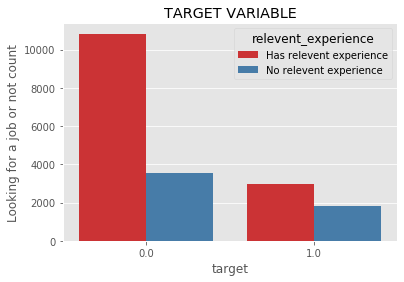

In [71]:
#Target Variable
sns.countplot(data=train, x='target',hue='relevent_experience',palette='Set1')
plt.title('TARGET VARIABLE')
plt.ylabel('Looking for a job or not count')
plt.show()

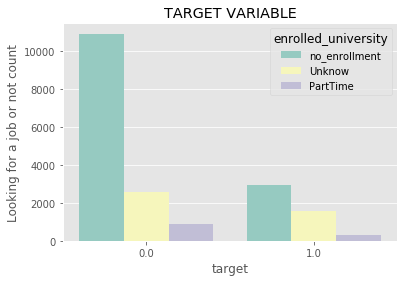

In [72]:
#Target Variable
sns.countplot(data=train, x='target',hue='enrolled_university',palette='Set3')
plt.title('TARGET VARIABLE')
plt.ylabel('Looking for a job or not count')
plt.show()

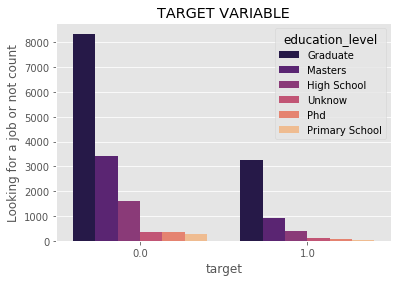

In [73]:
#Target Variable
sns.countplot(data=train, x='target',hue='education_level',palette='magma')
plt.title('TARGET VARIABLE')
plt.ylabel('Looking for a job or not count')
plt.show()

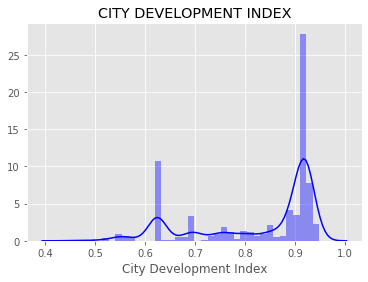

In [134]:
#City development index
sns.distplot(train['city_development_index'], color = 'blue',kde=True,)
plt.xlabel('City Development Index')
plt.title('CITY DEVELOPMENT INDEX')
plt.show()

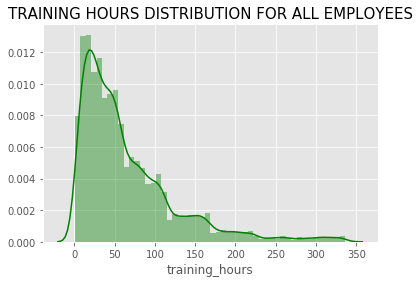

In [126]:
#Training Hours distribution
sns.distplot(train['training_hours'], color = 'green')
plt.title('TRAINING HOURS DISTRIBUTION FOR ALL EMPLOYEES', fontsize = 15)
plt.show()

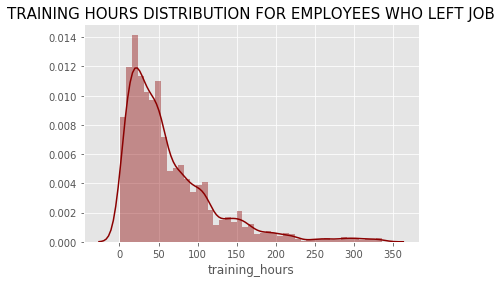

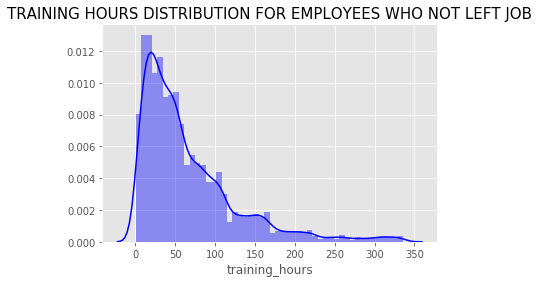

In [75]:
#Training Hours distribution for people who left job or not
#filtering employees by target
left = train[train['target']==1]
no_left = train[train['target']!=1]

#People who left
sns.distplot(left['training_hours'], color = 'darkred')
plt.title('TRAINING HOURS DISTRIBUTION FOR EMPLOYEES WHO LEFT JOB', fontsize = 15)
plt.show()

#People who don´t left
sns.distplot(no_left['training_hours'], color = 'blue')
plt.title('TRAINING HOURS DISTRIBUTION FOR EMPLOYEES WHO NOT LEFT JOB', fontsize = 15)
plt.show()

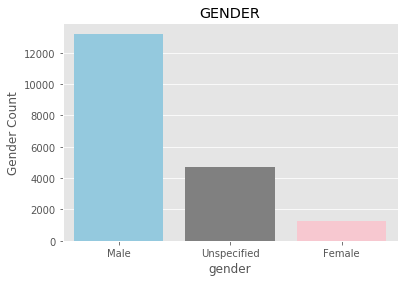

In [76]:
#Gender Variable
color_gender = ['skyblue','gray','pink']
sns.countplot(data=train, x='gender',palette=color_gender)
plt.title('GENDER')
plt.ylabel('Gender Count')
plt.show()

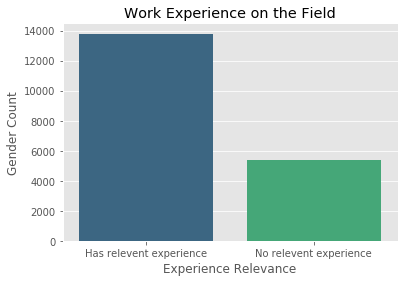

In [77]:
#Experience Variable
sns.countplot(data=train, x='relevent_experience',palette='viridis')
plt.title('Work Experience on the Field')
plt.ylabel('Gender Count')
plt.xlabel('Experience Relevance')
plt.show()

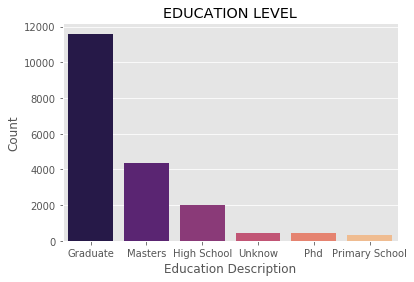

In [78]:
#enrolled Variable
sns.countplot(data=train, x='education_level',palette='magma')
plt.title('EDUCATION LEVEL')
plt.ylabel('Count')
plt.xlabel('Education Description')
plt.show()

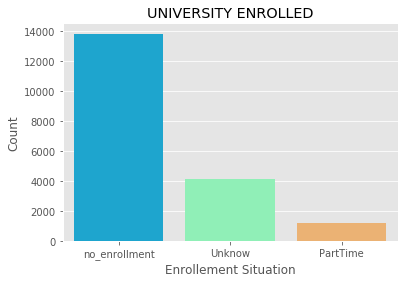

In [79]:
#enrolled Variable
sns.countplot(data=train, x='enrolled_university',palette='rainbow')
plt.title('UNIVERSITY ENROLLED')
plt.ylabel('Count')
plt.xlabel('Enrollement Situation')
plt.show()

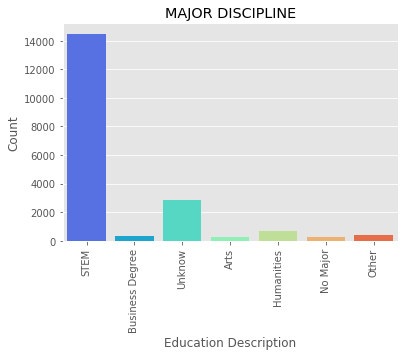

In [80]:
#Major Discipline
sns.countplot(data=train, x='major_discipline',palette='rainbow')
plt.title('MAJOR DISCIPLINE')
plt.ylabel('Count')
plt.xlabel('Education Description')
plt.xticks(rotation=90)
plt.show()

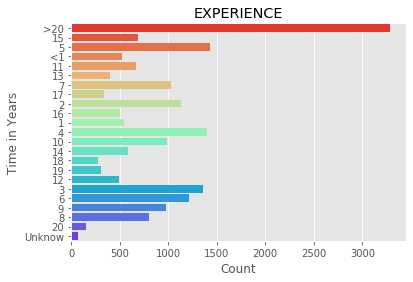

In [81]:
#experience Variable
sns.countplot(data=train, y='experience',palette='rainbow_r')
plt.title('EXPERIENCE')
plt.ylabel('Time in Years')
plt.xlabel('Count')
plt.show()

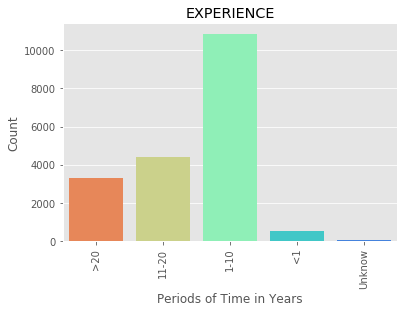

In [82]:
#Experience Variable
sns.countplot(data=train, x='experience_summary',palette='rainbow_r')
plt.title('EXPERIENCE')
plt.ylabel('Count')
plt.xlabel('Periods of Time in Years')
plt.xticks(rotation=90)
plt.show()

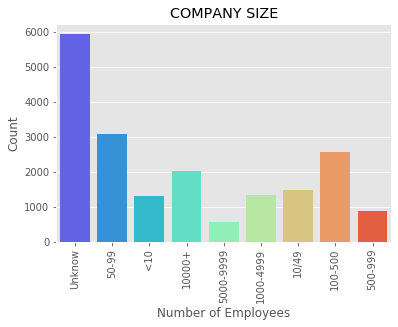

In [83]:
#Company Size
sns.countplot(data=train, x='company_size',palette='rainbow')
plt.title('COMPANY SIZE')
plt.ylabel('Count')
plt.xlabel('Number of Employees')
plt.xticks(rotation=90)
plt.show()

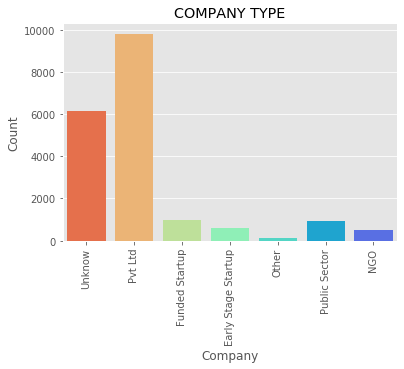

In [84]:
#Company type
sns.countplot(data=train, x='company_type',palette='rainbow_r')
plt.title('COMPANY TYPE')
plt.ylabel('Count')
plt.xlabel('Company')
plt.xticks(rotation=90)
plt.show()

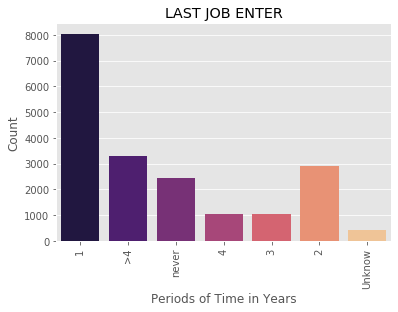

In [85]:
#enrolled Variable
sns.countplot(data=train, x='last_new_job',palette='magma')
plt.title('LAST JOB ENTER')
plt.ylabel('Count')
plt.xlabel('Periods of Time in Years')
plt.xticks(rotation=90)
plt.show()

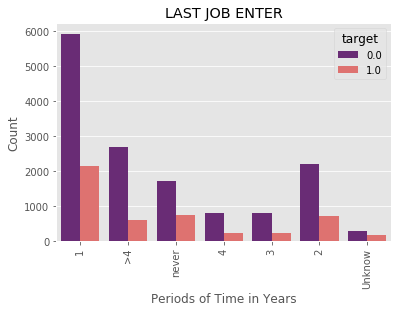

In [86]:
#last job
sns.countplot(data=train, x='last_new_job',palette='magma',hue='target')
plt.title('LAST JOB ENTER')
plt.ylabel('Count')
plt.xlabel('Periods of Time in Years')
plt.xticks(rotation=90)
plt.show()

#### **1.3 Preparing Data for Model**

In [87]:
#Adding additional df to handle the model
model_df = train

#Creating Dummy variables
model_df = pd.get_dummies(model_df)

#### **1.4 Models**

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [89]:
#Data Split 

#Input Values
X = model_df.drop(columns=['target'])

#Target Variable
y = model_df['target']
y.columns = ['target']

In [90]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [91]:
#RANDOM FOREST MODEL
random_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_classifier.fit(X_train, y_train)
random_prediction = random_classifier.predict(X_test)

In [92]:
#Model Accuracy
print(confusion_matrix(y_test, random_prediction))
print(classification_report(y_test, random_prediction))
print('Model Accuracy: ',accuracy_score(y_test, random_prediction))

[[3757  540]
 [ 829  622]]
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      4297
         1.0       0.54      0.43      0.48      1451

    accuracy                           0.76      5748
   macro avg       0.68      0.65      0.66      5748
weighted avg       0.75      0.76      0.75      5748

Model Accuracy:  0.761830201809325


**Since we have an umbalanced dataset on the target variabe, our model is very good to predict people who won´t quit working,
but not too good for people who may leave work** Lets balance the class **with oversampling method**

####  **1.4.1 Oversample Target**

In [93]:
#Lets oversampe
oversample = SMOTE()
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X,y)

In [94]:
#Checking 
print('X_smote shape', X_smote.shape)
print('y_smote shape', y_smote.shape)

X_smote shape (28762, 74)
y_smote shape (28762,)


In [95]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3,random_state=0)

In [96]:
#RANDOM FOREST MODEL
random_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
random_classifier.fit(X_train, y_train)
random_prediction = random_classifier.predict(X_test)

In [97]:
#Model Accuracy
print(confusion_matrix(y_test, random_prediction))
print(classification_report(y_test, random_prediction))
print('Model Accuracy: ',accuracy_score(y_test, random_prediction))

[[3646  603]
 [ 638 3742]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      4249
         1.0       0.86      0.85      0.86      4380

    accuracy                           0.86      8629
   macro avg       0.86      0.86      0.86      8629
weighted avg       0.86      0.86      0.86      8629

Model Accuracy:  0.8561826399351026


#### **1.4.2 Random Forest**

In [98]:
#Let´s Create an entire Function for the model, if we want to use it on another notebook
def hrAnalytics_randomForest():
    #Input Values
    X = model_df.drop(columns=['target'])
    #Target Variable
    y = model_df['target']
    y.columns = ['target']
    
    #Lets oversampe
    oversample = SMOTE()
    smote = SMOTE(random_state = 0)
    X_smote, y_smote = smote.fit_resample(X,y)
    
    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30,random_state=0)
    
    #RANDOM FOREST MODEL
    random_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
    random_classifier.fit(X_train, y_train)
    random_prediction = random_classifier.predict(X_test)
    
    #Model Accuracy
    print('RANDOM FOREST CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME')
    print(confusion_matrix(y_test, random_prediction))
    print(classification_report(y_test, random_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, random_prediction))
    
    #Save Model
    joblib.dump(random_classifier, 'hr_analytics_random_forest.joblib')
    
    return random_classifier
    

In [99]:
#MODEL
hrAnalytics_randomForest()

RANDOM FOREST CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME
[[3656  593]
 [ 653 3727]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      4249
         1.0       0.86      0.85      0.86      4380

    accuracy                           0.86      8629
   macro avg       0.86      0.86      0.86      8629
weighted avg       0.86      0.86      0.86      8629

Model Accuracy:  0.8556031985166299


RandomForestClassifier(n_estimators=200, random_state=0)

#### **1.4.3 K-nearest Neighbor**

In [100]:
def hrAnalytics_Knn():
    from sklearn.neighbors import KNeighborsClassifier
    #Input Values
    X = model_df.drop(columns=['target'])
    #Target Variable
    y = model_df['target']
    y.columns = ['target']
    
    #Lets oversampe
    oversample = SMOTE()
    smote = SMOTE(random_state = 0)
    X_smote, y_smote = smote.fit_resample(X,y)
    
    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30,random_state=0)
    
    #KNN MODEL
    knn_classifier = KNeighborsClassifier(n_neighbors=138)
    knn_classifier.fit(X_train, y_train)
    knn_prediction = random_classifier.predict(X_test)
    
    #Model Accuracy
    print('K-NEAREST NEIGHBOR CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME')
    print(confusion_matrix(y_test, knn_prediction))
    print(classification_report(y_test, knn_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, knn_prediction))
    
    #Save Model
    joblib.dump(knn_classifier, 'hr_analytics_knn.joblib')
    
    return knn_classifier
    

In [101]:
#Knearest Neighbor Model
hrAnalytics_Knn()

K-NEAREST NEIGHBOR CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME
[[3646  603]
 [ 638 3742]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      4249
         1.0       0.86      0.85      0.86      4380

    accuracy                           0.86      8629
   macro avg       0.86      0.86      0.86      8629
weighted avg       0.86      0.86      0.86      8629

Model Accuracy:  0.8561826399351026


KNeighborsClassifier(n_neighbors=138)

#### **1.4.4. Logistic Regression**

In [102]:
def hrAnalytics_lr():
    from sklearn.linear_model import LogisticRegressionCV
    #Input Values
    X = model_df.drop(columns=['target'])
    #Target Variable
    y = model_df['target']
    y.columns = ['target']
    
    #Lets oversampe
    oversample = SMOTE()
    smote = SMOTE(random_state = 0)
    X_smote, y_smote = smote.fit_resample(X,y)
    
    #Train and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30,random_state=0)
    
    #LOGISTIC REGRESSION MODEL
    lr_classifier =  LogisticRegressionCV(cv=5, random_state=0)
    lr_classifier.fit(X_train, y_train)
    lr_prediction = random_classifier.predict(X_test)
    
    #Model Accuracy
    print('LOGISTIC REGRESSION NEIGHBOR CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME')
    print(confusion_matrix(y_test, lr_prediction))
    print(classification_report(y_test, lr_prediction))
    print('Model Accuracy: ',accuracy_score(y_test, lr_prediction))
    
    #Save Model
    joblib.dump(lr_classifier, 'hr_analytics_logisticregression.joblib')
    
    return lr_prediction

In [103]:
#Calling Logistic Regression Function
hrAnalytics_lr()

LOGISTIC REGRESSION NEIGHBOR CLASSIFIER FOR HR ANALYTICS - JOB CHANGE TRAIN DATAFRAME
[[3646  603]
 [ 638 3742]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85      4249
         1.0       0.86      0.85      0.86      4380

    accuracy                           0.86      8629
   macro avg       0.86      0.86      0.86      8629
weighted avg       0.86      0.86      0.86      8629

Model Accuracy:  0.8561826399351026


array([1., 0., 1., ..., 0., 1., 1.])

#### **2 Testing Models on Test Dataset**

In [104]:
#Inspecting Test Dataset, with no target variable
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


#### **2.1 Data Cleaning on test Dataset**

In [105]:
# Apply the fillna method to incluce NaN string
test = test.fillna('NaN')

#Applying Functions to delete NaN values
test['gender'] = test['gender'].apply(gender)

test['enrolled_university'] = test['enrolled_university'].apply(course)

test['education_level'] = test['education_level'].apply(education_level)

test['major_discipline'] = test['major_discipline'].apply(major_discipline)

test['experience'] = test['experience'].apply(experience)

test['company_size'] = test['company_size'].apply(company_size)

test['company_type'] = test['company_type'].apply(company_type)

test['last_new_job'] = test['last_new_job'].apply(last_job)

test['experience_summary'] = test['experience'].apply(discrete_exp)

In [106]:
#shape
print('Test dataset shape: ',test.shape)

Test dataset shape:  (2129, 14)


#### **2.2 Preparing Data For the Model**

In [107]:
#Adding additional df to handle the model
test_df = test

#Dropping some uselless columns to fit the model
test_df = test_df.drop(columns=['enrollee_id', 'city'])

#Creating Dummy variables
test_df = pd.get_dummies(test_df)

#### **2.3 Model Fit**

In [108]:
#Fitting Model to the Test Dataset
test_set_predictions = random_classifier.predict(test_df)

#Creating Dataframe with resuts
quit_job = pd.DataFrame(test_set_predictions)
quit_job.columns = ['Quit']

#Appending survive dataframe to test
test = test.join(quit_job)

#####  **2.4 Plot Predictions**

Text(0.5, 1.0, 'DATA SCIENTISTS JOB CHANGE PREDICTION')

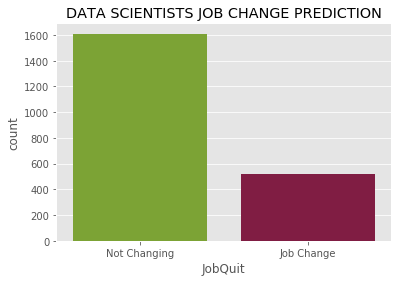

In [109]:
#Creating Plot to show predictions
test['JobQuit'] = test.Quit.apply(job_quit)
color = ['#81B622','#900C3F']
sns.countplot(data=test, x='JobQuit',palette=color)
plt.title('DATA SCIENTISTS JOB CHANGE PREDICTION')

In [110]:
#Final Result
final_result = test[['enrollee_id','Quit']]
print(final_result.head(10))

   enrollee_id  Quit
0        32403   0.0
1         9858   0.0
2        31806   0.0
3        27385   0.0
4        27724   0.0
5          217   0.0
6        21465   1.0
7        27302   0.0
8        12994   0.0
9        16287   0.0


In [135]:
#Dowloading CSV file
final_result.to_csv(r'C:\\Users\\Asus\\Desktop\\Quitjob\\data\\predictions.csv')

#### **1.6 Final Insights and Conclusions**

Since the training dataset had the target class unbalanced, our first model had a fairly good overall effectiveness, however when looking at metrics such as the f1-score, we observed that the model had quite a bit of trouble predicting candidates who are likely to change jobs. .

So it is oversampled to target variable with a data augmentation technique called SMOT, short for Synthetic Minority Oversampling Technique.

although these examples don't add any new information to the model. Instead, new examples can be synthesized from the existing examples. Improving our model.

Thanks to machine learning algorithms, companies can predict if an employee is more likely to switch working place.